## Distance to Annotation

In [17]:
## Parameters specific to where your folders are and your data
parameter_file = '../params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os
import scipy.stats as stats
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
('Number of tissues: ', 13)


## Plotting attributes

In [4]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [5]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

# i. 
Same strand, merged samples

Mean: 78.5239020654
Std: 470.578113635
Absolute Mean: 374.471218225
Absolute Std: 295.602894013


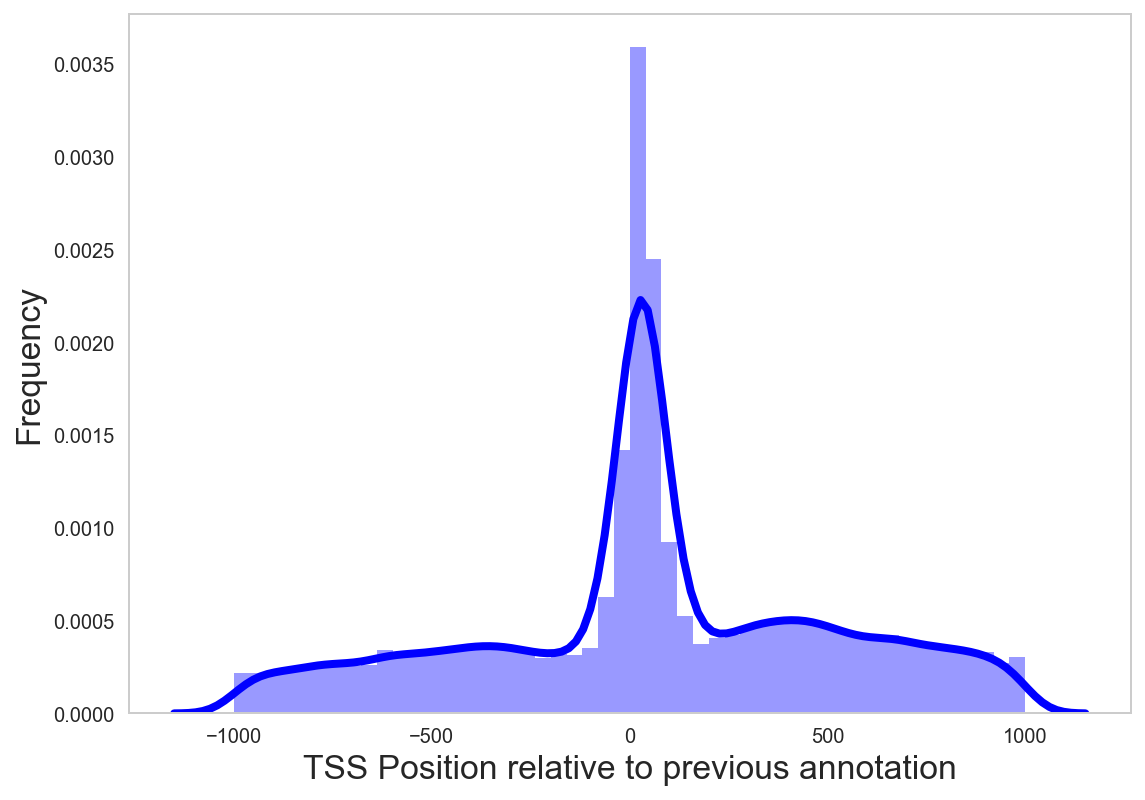

In [4]:
anno_peaks = pd.read_csv('Results/merged/peaks_with_tss_distances.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 1000]

sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Figure3/Distance_to_Anno/i.png",bbox_inches='tight')

print("Mean: %s" % (np.mean(anno_peaks["Distance to TSS"])))
print("Std: %s" % (np.std(anno_peaks["Distance to TSS"])))

print("Absolute Mean: %s" % (np.mean(np.abs(anno_peaks["Distance to TSS"]))))
print("Absolute Std: %s" % (np.std(np.abs(anno_peaks["Distance to TSS"]))))


# ii.
Using Output TSS1.exp.bed

In [6]:
import annotation

In [6]:
peaks_file = "Results/output/TSS1.exp.bed"

peaks_with_dist = annotation.wrap_distance_to_landmarks(peaks_file, landmark_file=tss_annotation,
                          main_landmark = 'transcript_id',landmark_cols=[],is_bed=True,
                          output_f='Results/Figures/Figure3/Distance_to_Anno/ii.tsv',is_parallel=True,num_par=12)

/data/isshamie/TSS/Analysis/src/annotation.py:114: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  filt2 = np.abs(filt['actual_start'] - peak_start).argmin()
/data/isshamie/TSS/Analysis/src/annotation.py:124: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', peak_start - landmark_df.loc[filt2, 'actual_start'])
/data/isshamie/TSS/Analysis/src/annotation.py:115: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Nearest TSS', landmark_df.loc[filt2, main_landmark])
/data/isshamie/TSS/Analysis/src/annotation.py:126: FutureWarning: set_value is deprecated and will be removed in a future release. Plea

/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])
/data/isshamie/TSS/Analysis/src/annotation.py:114: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  filt2 = np.abs(filt['actual_start'] - peak_start).argmin()
/data/isshamie/TSS/Analysis/src/annotation.py:124: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', peak_start - landmark_df.loc[filt2, 'actual_start'])
/data/isshamie/TSS/Analysis/src/annotation.py:115: FutureWarning: set_value is deprecated and will be removed in a future 

/data/isshamie/TSS/Analysis/src/annotation.py:126: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', landmark_df.loc[filt2, 'actual_start'] - peak_start)
/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])


In [7]:
peaks_file = "Results/output/TSS1.exp.bed"

In [11]:
anno_peaks = pd.read_csv('Results/Figures/Figure3/Distance_to_Anno/ii.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 1000]
anno_peaks  = anno_peaks[anno_peaks['isSameStrand']]

In [12]:
anno_peaks.head()

,Chr,Start,End,Strand,Stat,Nearest TSS,Distance to TSS,isSameStrand
ID,,,,,,,,
p1@Bmp4_XM_027386528.1,NW_020822366.1,724533,724683,-,4.074290,XM_027386528.1,2.0,True
p1@Cdkn3_XM_027386531.1,NW_020822366.1,1085431,1085581,+,1.212188,XM_027386531.1,71.0,True
p1@Cnih1_XM_027386534.1,NW_020822366.1,1114280,1114430,-,1.527630,XM_027386534.1,58.0,True
p2@Cnih1_XM_027386534.1,NW_020822366.1,1113842,1113992,-,1.049218,XM_027386534.1,496.0,True
p1@Gmfb_XM_027386535.1,NW_020822366.1,1152921,1153071,-,1.688420,XM_027386535.1,52.0,True


ModeResult(mode=array([ 19.]), count=array([88]))


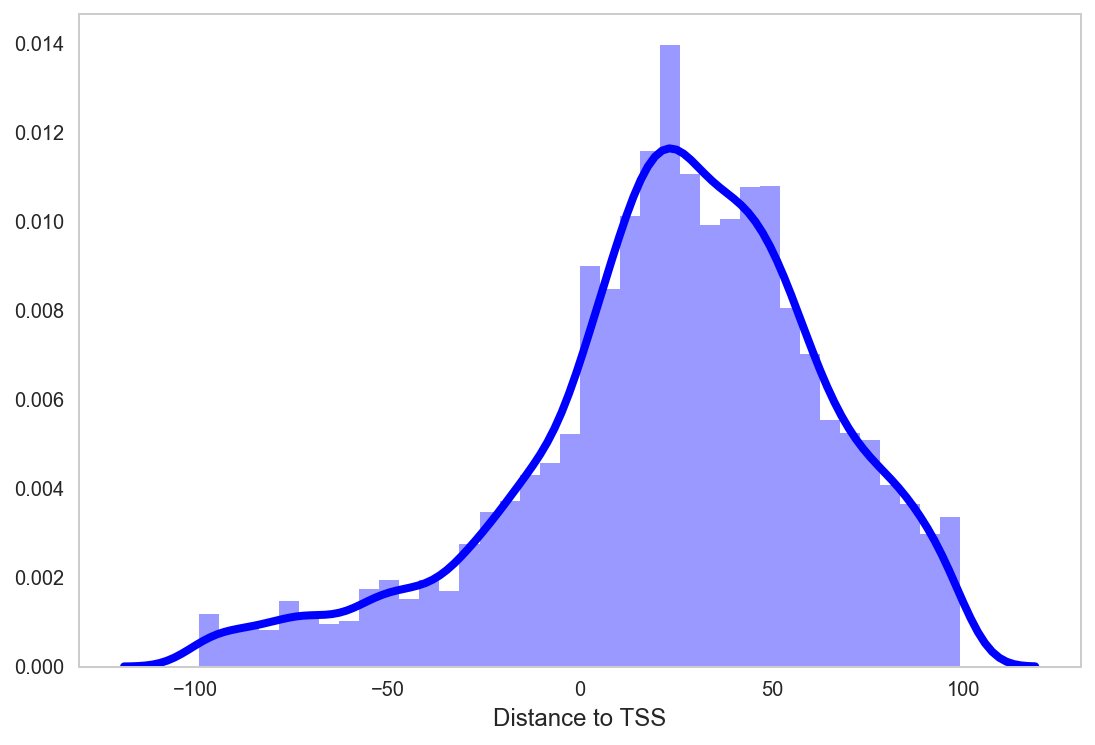

In [23]:
curr = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 100]

sns.distplot(curr[curr["Strand"] == "-"]['Distance to TSS'])
print(stats.mode(curr[curr["Strand"] == "-"]['Distance to TSS']))

ModeResult(mode=array([ 16.]), count=array([106]))


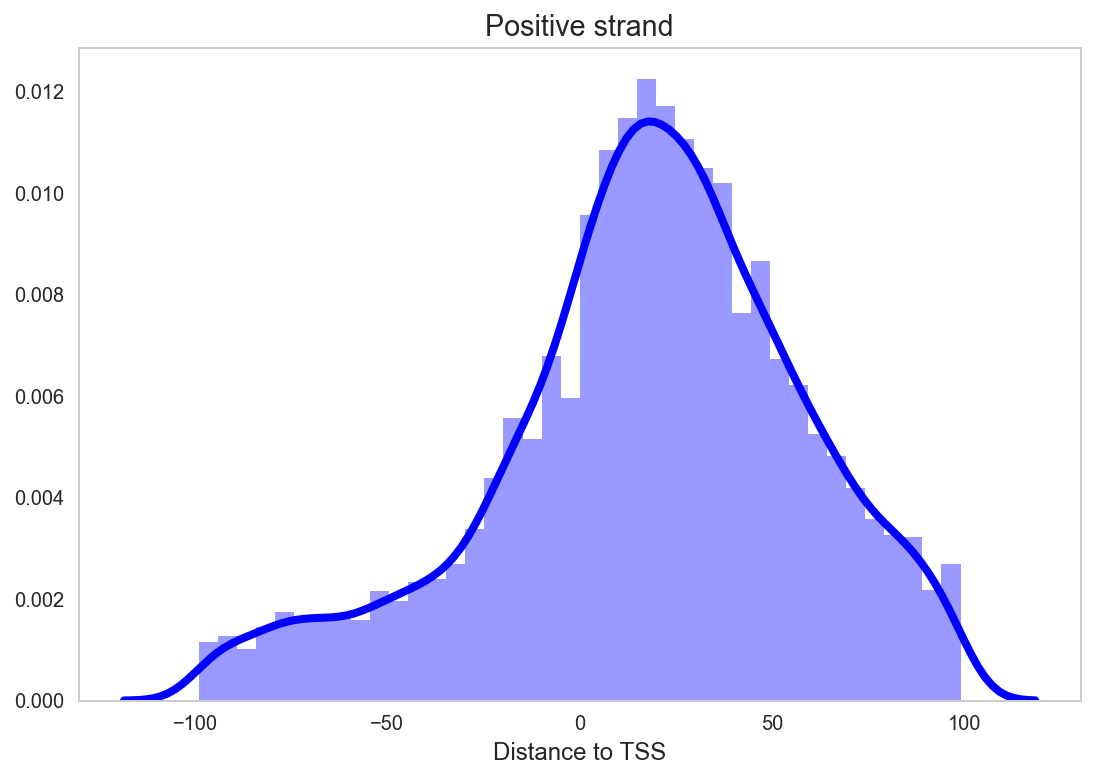

In [24]:
sns.distplot(curr[curr["Strand"] == "+"]['Distance to TSS'])
plt.title("Positive strand")
print(stats.mode(curr[curr["Strand"] == "+"]['Distance to TSS']))

In [25]:
anno_peaks.head()

,Chr,Start,End,Strand,Stat,Nearest TSS,Distance to TSS,isSameStrand
ID,,,,,,,,
p1@Bmp4_XM_027386528.1,NW_020822366.1,724533,724683,-,4.074290,XM_027386528.1,2.0,True
p1@Cdkn3_XM_027386531.1,NW_020822366.1,1085431,1085581,+,1.212188,XM_027386531.1,71.0,True
p1@Cnih1_XM_027386534.1,NW_020822366.1,1114280,1114430,-,1.527630,XM_027386534.1,58.0,True
p2@Cnih1_XM_027386534.1,NW_020822366.1,1113842,1113992,-,1.049218,XM_027386534.1,496.0,True
p1@Gmfb_XM_027386535.1,NW_020822366.1,1152921,1153071,-,1.688420,XM_027386535.1,52.0,True


Mean: 60.5156657269
Std: 452.946100975
Absolute Mean: 342.551412309
Absolute Std: 302.458007188


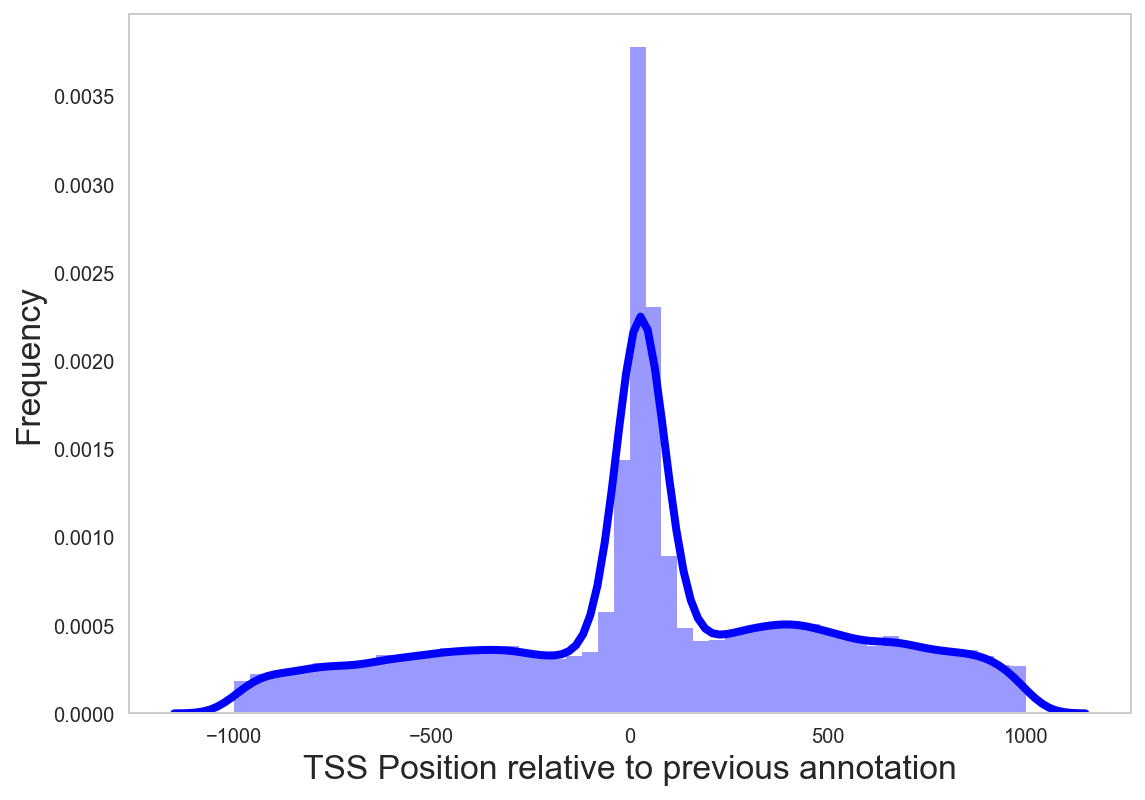

In [7]:
anno_peaks = pd.read_csv('Results/Figures/Figure3/Distance_to_Anno/ii.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 1000]

sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Figure3/Distance_to_Anno/ii.png",bbox_inches='tight')

print("Mean: %s" % (np.mean(anno_peaks["Distance to TSS"])))
print("Std: %s" % (np.std(anno_peaks["Distance to TSS"])))

print("Absolute Mean: %s" % (np.mean(np.abs(anno_peaks["Distance to TSS"]))))
print("Absolute Std: %s" % (np.std(np.abs(anno_peaks["Distance to TSS"]))))

# iii.
## With only peak1

In [8]:
import Homer

In [9]:
peaks_file = "Results/output/TSS1.exp.bed"
df = Homer.read_bed_file(peaks_file)
df = df[df.index.str.contains("p1@")]
out = "TSS1_only_peak1.exp.bed"
df["ID"] = df.index
df = df[["Chr", "Start","End","ID","Stat","Strand"]]
df.to_csv(out,sep="\t",header=None,index=None)


peaks_with_dist = annotation.wrap_distance_to_landmarks(out, landmark_file=tss_annotation,
                          main_landmark = 'transcript_id',landmark_cols=[],is_bed=True,
                          output_f='Results/Figures/Figure3/Distance_to_Anno/iii.tsv',is_parallel=True,num_par=12)

/data/isshamie/TSS/Analysis/src/annotation.py:114: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  filt2 = np.abs(filt['actual_start'] - peak_start).argmin()
/data/isshamie/TSS/Analysis/src/annotation.py:124: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', peak_start - landmark_df.loc[filt2, 'actual_start'])
/data/isshamie/TSS/Analysis/src/annotation.py:115: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Nearest TSS', landmark_df.loc[filt2, main_landmark])
/data/isshamie/TSS/Analysis/src/annotation.py:126: FutureWarning: set_value is deprecated and will be removed in a future release. Plea

/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])
/data/isshamie/TSS/Analysis/src/annotation.py:114: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  filt2 = np.abs(filt['actual_start'] - peak_start).argmin()
/data/isshamie/TSS/Analysis/src/annotation.py:126: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', landmark_df.loc[filt2, 'actual_start'] - peak_start)
/data/isshamie/TSS/Analysis/src/annotation.py:115: FutureWarning: set_value is deprecated and will be removed in a future 

/data/isshamie/TSS/Analysis/src/annotation.py:124: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', peak_start - landmark_df.loc[filt2, 'actual_start'])
/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])


Mean: 26.3171319542
Std: 304.52502378
Absolute Mean: 186.274151436
Absolute Std: 242.342778001


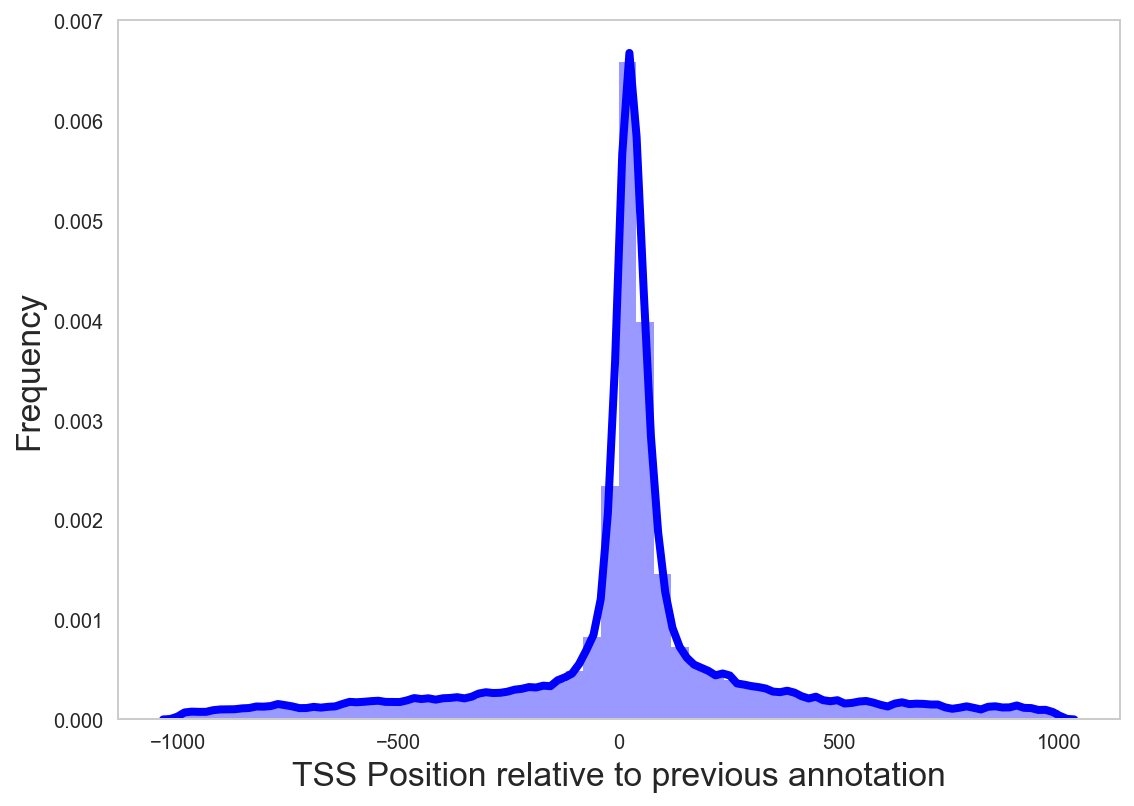

In [10]:

anno_peaks = pd.read_csv('Results/Figures/Figure3/Distance_to_Anno/iii.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 1000]

sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Figure3/Distance_to_Anno/iii.png",bbox_inches='tight')

print("Mean: %s" % (np.mean(anno_peaks["Distance to TSS"])))
print("Std: %s" % (np.std(anno_peaks["Distance to TSS"])))

print("Absolute Mean: %s" % (np.mean(np.abs(anno_peaks["Distance to TSS"]))))
print("Absolute Std: %s" % (np.std(np.abs(anno_peaks["Distance to TSS"]))))

In [11]:
(np.abs(anno_peaks["Distance to TSS"]) > 100).sum()

8023

In [12]:
anno_peaks.shape

(19916, 8)

# iv. Remove genes that are back-to-back with another gene